# Guiding questions

At Columbia University, how has sex representation in every broad field of study fluctuated over the past twenty years?

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(
    '../data/GSS_Export_Broad_Sex.csv', 
    thousands=',',
    header=4, # starting at 4th row
    skipfooter=4, # ignore last 4 lines of data (footer)
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    names = ['Year', 'Institution Name', 'Broad Fields', 'Sex', 'Total']
)

# remove institution name
df.drop('Institution Name', axis=1, inplace=True)

In [26]:
# Format: { year: { field: { sex : count } } }
counts = defaultdict(lambda: defaultdict(dict))

# loop through all rows in dataframe
for _, row in df.iterrows():
    year = row['Year']
    field = row['Broad Fields']
    sex = row['Sex']
    count = row['Total']
    counts[year][field][sex] = count
    
#counts

In [33]:
years = [year for year in range(1994, 2017)]

# eliminate repetition and categorize main fields and sexes
fields = list(df['Broad Fields'].unique()) 
sexes = list(df['Sex'].unique())
sexes.remove('Total for selected values')

In [5]:
def stack_proportions(ax, field, legend=False, exclude=None):
    stacks = {r: [] for r in sexes if r != exclude}
    
    for year in years:
        field_counts = counts[year][field]
        total = field_counts['Total for selected values'] - field_counts.get(exclude, 0)
        for r in sexes:
            if r != exclude:
                stacks[r].append(field_counts.get(r, 0) / total)

    ax.stackplot(years, stacks.values(), labels=stacks.keys())
    
    if legend:
        ax.legend()
        ax.set_title('LEGEND')
        return

    ax.set(title=field, xlabel='Year')
    
    # y tick labels as percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

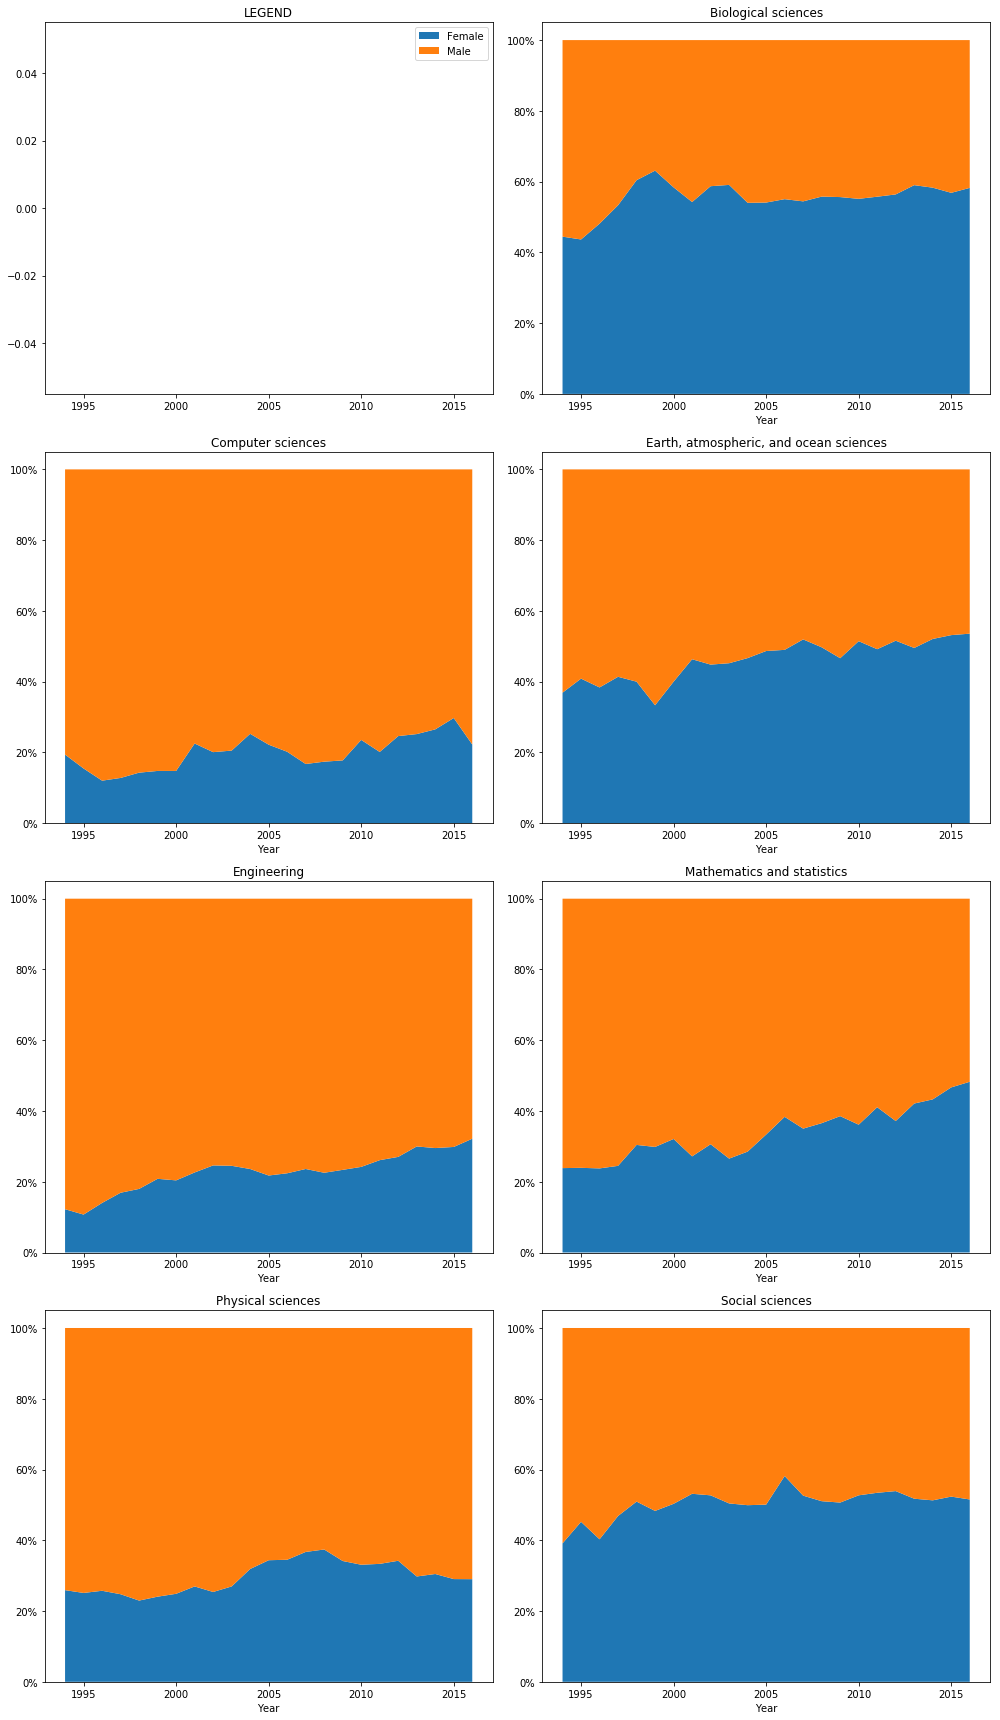

In [6]:
incompleteFields = ['Clinical medicine', 'Neurobiology and neuroscience', 'Other health', 'Psychology']
completeFields = [f for f in fields if f not in incompleteFields]

fig, ax = plt.subplots(4, 2, figsize=(14, 24))
for index, field in enumerate(completeFields):
    stack_proportions(ax[index // 2, index % 2], field, legend=(index == 0))

fig.tight_layout()

In [7]:
def plot_counts(ax, field, exclude=None, legend=False):
    for r in sexes:
        if r != exclude:
            ax.plot(
                years,
                [counts[year][field].get(r, 0) for year in years],
                label=r,
            )
    
    if legend:
        ax.legend()
        ax.set_title('LEGEND')
        return

    ax.set(title=field, xlabel='Year')

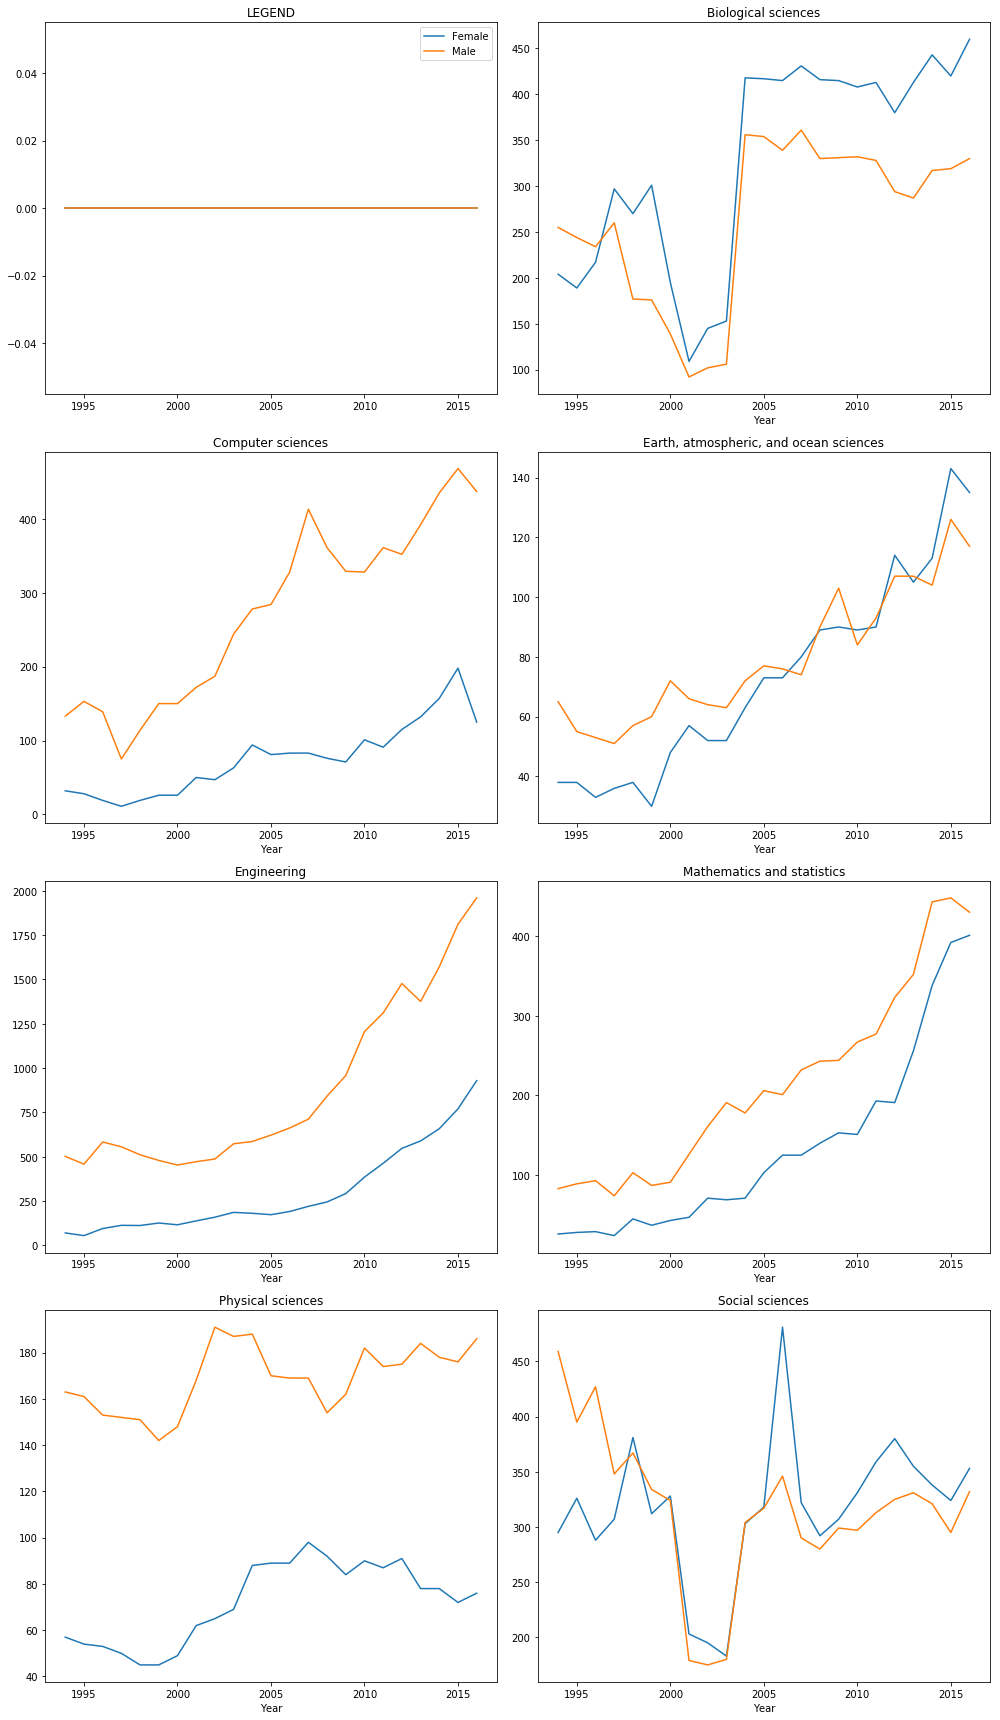

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(14, 24))
for index, field in enumerate(completeFields):
    plot_counts(ax[index // 2, index % 2], field, legend=(index == 0))

fig.tight_layout()

# Findings

The number of females now studying in various academic fields has grown tremendously. In a few academic fields, females are now outperforming males where there were initially substantially less females. Despite this, there tends to be a large disparity between the number of males and females studying in STEM-related fields. Though more females have consistently studied the biological and social sciences, there are still extremely large divisions between the number of males and females studying engineering, computer sciences, etc. 

This begs the question of whether the University is aware of the lack of females in majority of academic fields and how such exclusivity has been generated and still exists. What measures has it taken or does it plan to take to foster greater diversity within presently male-dominated fields?